# Prompt 5: Where could investing in nature-based solutions have the greatest capacity for reducing inequities? 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import json
import requests
import geopandas as gpd
from shapely.geometry import Point

In [2]:
calenviro = pd.read_excel(io = "calenviroscreen40resultsdatadictionary_F_2021.xlsx", sheet_name = 'CES4.0FINAL_results')
bay_area_counties = ['Marin ', 'San Mateo', 'Napa ', 'Contra Costa', 'Santa Clara', 'Alameda ', 'Sonoma ', 'San Francisco', 'Solano ']
#calenviro = calenviro.iloc[:,[0,1,2,3,7,8,9]]  i just commented this out bc I don't understand it and it was erroring me trying to filter for bay area counties 
calenviro = calenviro[calenviro["California County"].isin(bay_area_counties)]
our_scores = pd.read_csv("/work/bay_area_tracts_cleaned.csv")
nbs_cols = ["wetlands_value", "vernalpools_value", "naturalriver_value", "naturalbaylands_value", "hirechargevulnerable_value", "floodplain500_natural_value", "carbon_urbanforest_value", "drinkingwater_value"]
our_scores_nbs = our_scores[["wetlands_value", "vernalpools_value", "naturalriver_value", "naturalbaylands_value", "hirechargevulnerable_value", "floodplain500_natural_value", "carbon_urbanforest_value", "drinkingwater_value"]]
totals = our_scores[nbs_cols].sum(axis=1)
d = {"census_tract":our_scores['census_tract'], "Total":totals}
tract_scores = pd.DataFrame(data=d)
tract_scores["NBS Score"] = tract_scores.apply(lambda x: stats.percentileofscore(tract_scores["Total"], x["Total"]), axis =1)
tract_scores["NBS Score"] = 100 - tract_scores["NBS Score"]
all_merged = calenviro.merge(tract_scores, left_on = 'Census Tract', right_on = 'census_tract')
all_merged['highest_combined'] = all_merged[' CES 4.0 Percentile'] + all_merged['NBS Score']


In [3]:
all_merged

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,census_tract,Total,NBS Score,highest_combined
0,6095250701,3529,Solano,94590,Vallejo,-122.244902,38.090042,65.121123,97.869390,95-100% (highest scores),...,93.714211,25.2,80.747782,84.702998,8.786454,96.419566,6095250701,6045,55.895692,153.765081
1,6001407300,2420,Alameda,94601,Oakland,-122.210924,37.762179,65.033685,97.844175,95-100% (highest scores),...,89.666840,35.5,96.527250,82.401839,8.547749,94.856278,6001407300,418,96.371882,194.216058
2,6001409000,4687,Alameda,94621,Oakland,-122.221368,37.720011,63.172581,97.175996,95-100% (highest scores),...,69.976575,23.0,74.043093,81.647104,8.469458,94.162885,6001409000,4725,63.151927,160.327923
3,6001408800,7149,Alameda,94621,Oakland,-122.196942,37.758804,61.006902,96.243066,95-100% (highest scores),...,79.724102,23.3,75.107731,86.773704,9.001254,97.743318,6001408800,740,94.841270,191.084336
4,6013365002,5590,Contra Costa,94801,North Richmond,-122.384395,37.959466,60.675239,96.142209,95-100% (highest scores),...,41.840187,25.5,81.520913,81.979672,8.503957,94.465456,6013365002,9092,43.990930,140.133138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,6075980900,253,San Francisco,94124,San Francisco,-122.389477,37.746286,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6075980900,1712,87.471655,NaN
1401,6081984300,0,San Mateo,94128,Unincorporated San Mateo County area,-122.376861,37.614758,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6081984300,400,96.428571,NaN
1402,6085511608,3302,Santa Clara,94305,Stanford,-122.177218,37.429257,NaN,NaN,NaN,...,70.900573,NaN,NaN,NaN,NaN,NaN,6085511608,11904,35.374150,NaN
1403,6095253000,6720,Solano,95687,Vacaville,-121.978785,38.320656,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6095253000,14097,30.272109,NaN


In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_df = all_merged[['Longitude', 'Latitude', 'highest_combined']]

In [6]:
ca = gpd.read_file('/work/Bay Area Counties.zip')

                         geometry
0     POINT (-122.24490 38.09004)
1     POINT (-122.21092 37.76218)
2     POINT (-122.22137 37.72001)
3     POINT (-122.19694 37.75880)
4     POINT (-122.38440 37.95947)
...                           ...
1400  POINT (-122.38948 37.74629)
1401  POINT (-122.37686 37.61476)
1402  POINT (-122.17722 37.42926)
1403  POINT (-121.97878 38.32066)
1404  POINT (-121.94565 38.25445)

[1405 rows x 1 columns]


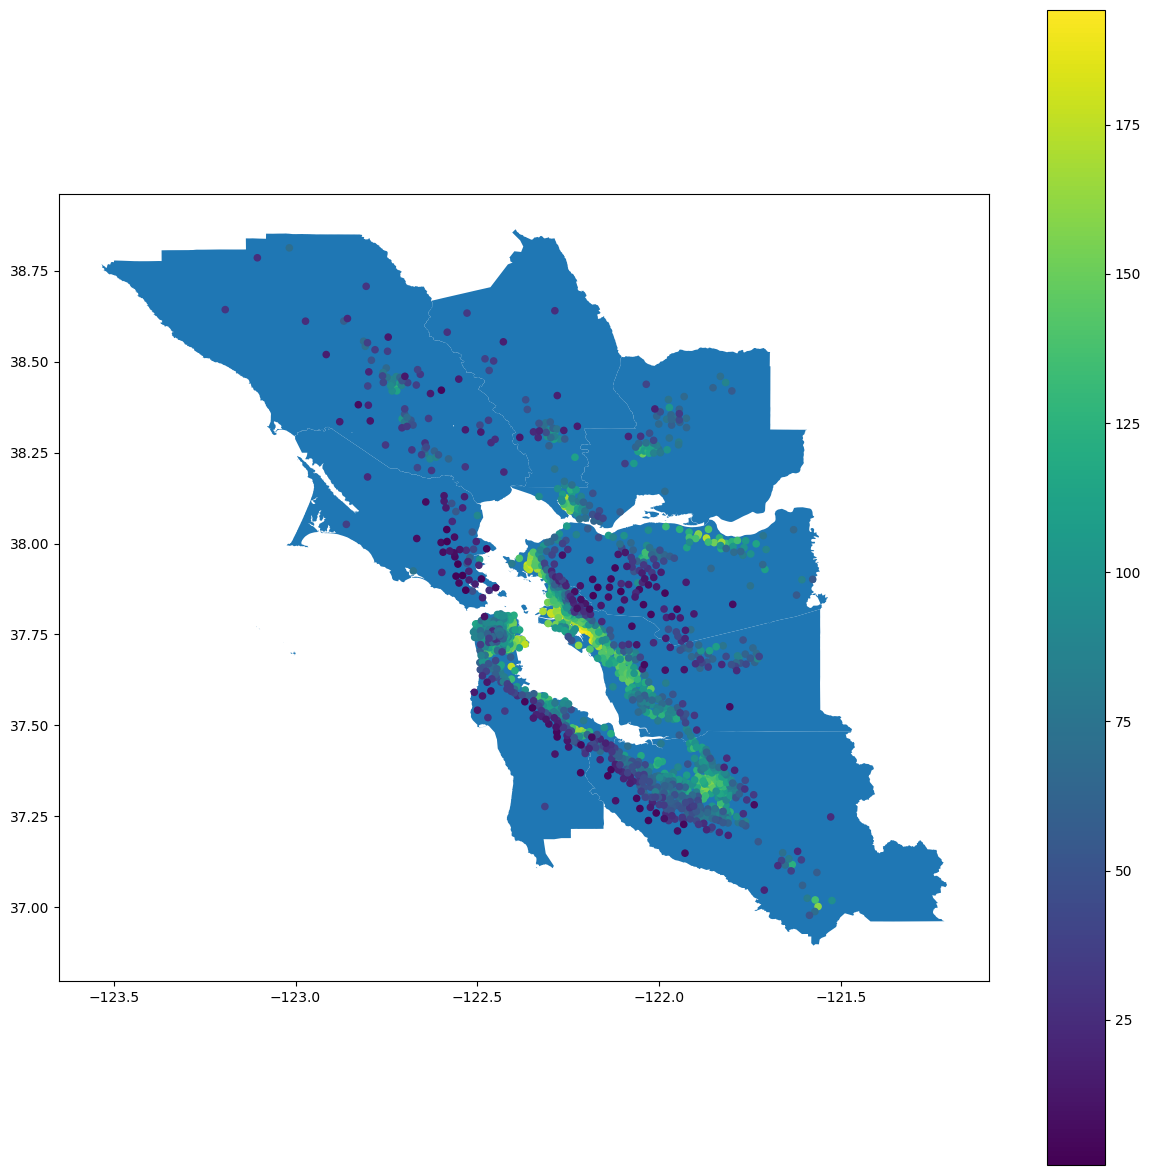

In [7]:
lo=all_merged['Longitude'].tolist()
la=all_merged['Latitude'].tolist()

#us = world.query('name == "United States of America"')
fig,ax = plt.subplots(figsize = (15,15))
ca.plot(ax = ax)
geometry = [Point(xy) for xy in zip(lo,la)]
geo_df = gpd.GeoDataFrame(geometry = geometry)
print(geo_df)
g = geo_df.plot(ax = ax, markersize = 20, label = 'CA', column=all_merged['highest_combined'], legend=True)
plt.show()

In [ ]:
#json file 

#import requests

#geojson_url= 'https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json'
#response = requests.get(geojson_url)
#geojson = response.json()
#geojson

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=08c08e4f-c970-41e1-98db-afa3328b10c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>